In [253]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

pd.set_option('display.max_columns',None)

In [254]:
data = pd.read_excel(r'lgd.xlsx')

data.head()

,Exposure Amount ($),LGD ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region
0,238203,2382,729,36,3.8100,47603,88,24,4,2,Rent,Home Improvement,Adjustable Rate,South
1,170008,128727,745,36,6.6800,67474,71,43,4,2,Mortgage,Auto Loan,Adjustable Rate,South
2,198937,114418,681,24,8.3800,77036,74,46,6,1,Own,Personal Loan,Fixed Rate,West
3,262045,2620,684,48,5.4500,55083,85,24,0,0,Mortgage,Home Purchase,Adjustable Rate,West
4,243378,245105,758,72,6.6400,70148,78,40,5,0,Mortgage,Debt Consolidation,Fixed Rate,North


In [255]:
data.describe(include='all')

,Exposure Amount ($),LGD ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region
count,40000.0000,40000.0000,40000.0000,40000.0000,40000.0000,40000.0000,40000.0000,40000.0000,40000.0000,40000.0000,40000,40000,40000,40000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,2,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rent,Auto Loan,Adjustable Rate,North
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13420,8163,20161,10165
mean,149811.0704,52923.7196,700.6673,47.9106,6.4996,60069.3068,79.9822,30.0804,5.0023,0.9989,NaN,NaN,NaN,NaN
std,49836.9643,67024.9097,49.9742,17.0085,1.5047,19926.4975,9.9866,9.9822,2.0156,0.8185,NaN,NaN,NaN,NaN
min,-82998.0000,-20636.0000,505.0000,24.0000,0.3800,-17513.0000,37.0000,-13.0000,-5.0000,0.0000,NaN,NaN,NaN,NaN
25%,116398.0000,1662.0000,667.0000,36.0000,5.4800,46567.5000,73.0000,23.0000,4.0000,0.0000,NaN,NaN,NaN,NaN
50%,149822.5000,25808.5000,701.0000,48.0000,6.4900,60058.0000,80.0000,30.0000,5.0000,1.0000,NaN,NaN,NaN,NaN
75%,183328.0000,83867.2500,734.0000,60.0000,7.5200,73416.7500,87.0000,37.0000,6.0000,2.0000,NaN,NaN,NaN,NaN


In [256]:
data.isnull().sum()

Exposure Amount ($)           0
LGD ($)                       0
Credit Score                  0
Loan Term (Months)            0
Interest Rate (%)             0
Income ($)                    0
Loan to Value Ratio (%)       0
Debt to Income Ratio (%)      0
Employment History (Years)    0
Previous Defaults             0
Home Ownership                0
Loan Purpose                  0
Loan Type                     0
Region                        0
dtype: int64

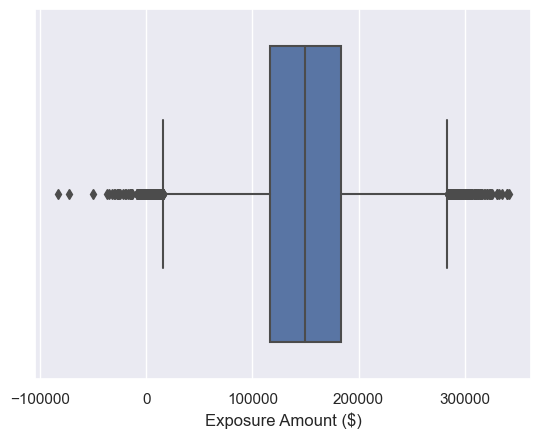

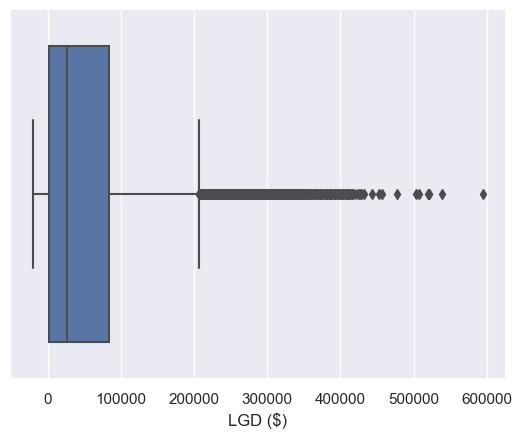

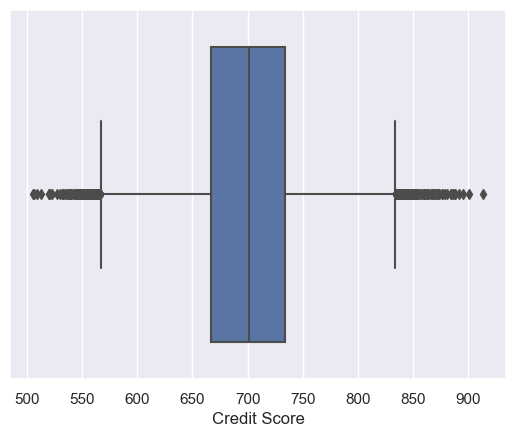

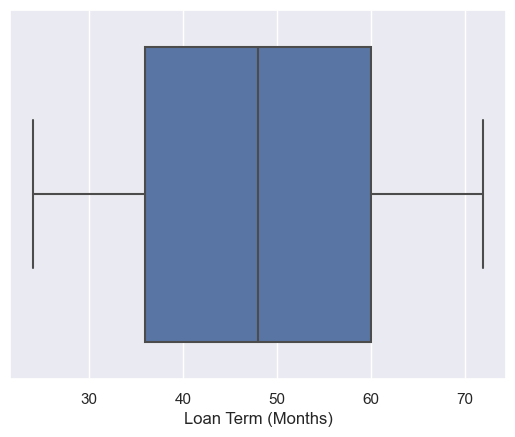

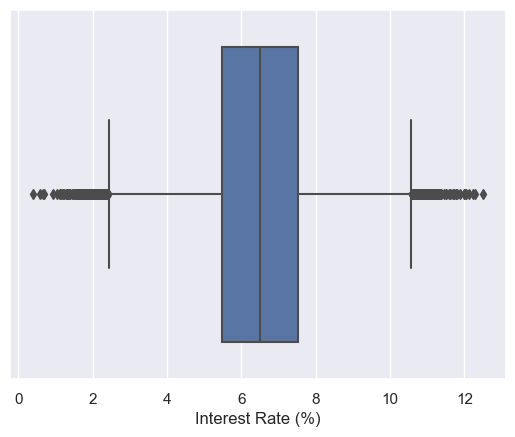

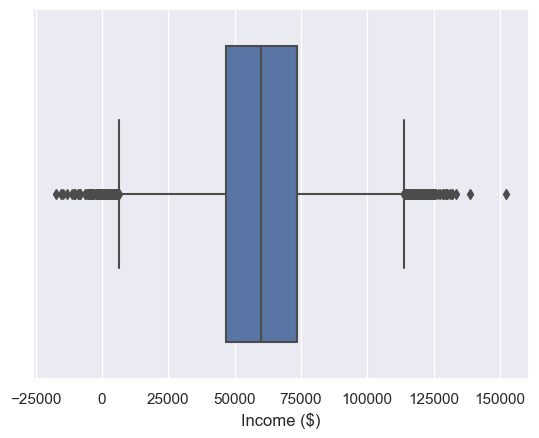

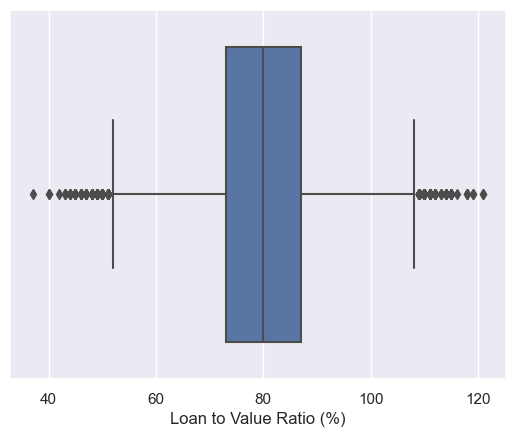

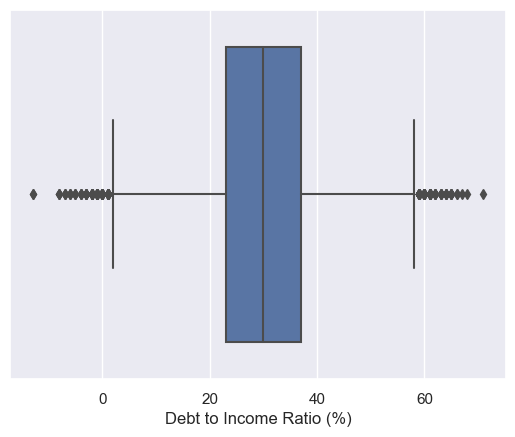

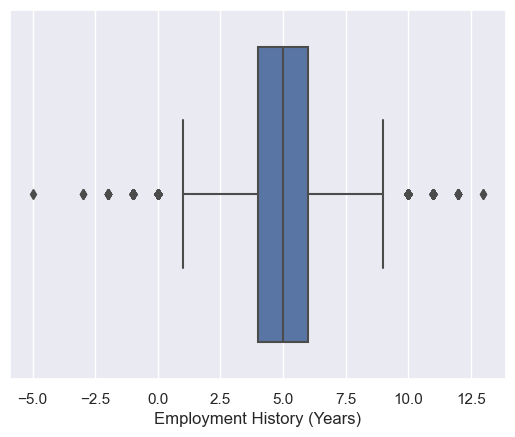

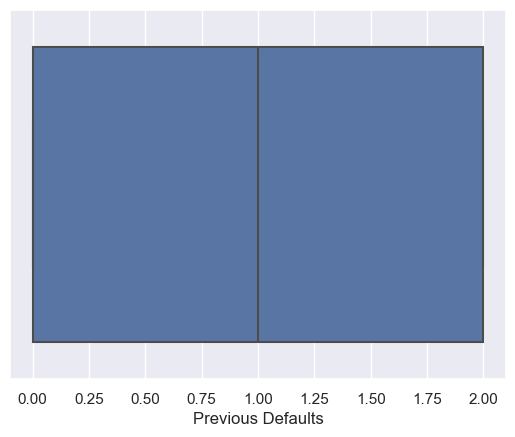

In [257]:
for i in data.columns:
    if data[i].dtypes!=object:
        sns.boxplot(data=data,x=data[i])
        plt.show()


In [258]:
q1=data.quantile(0.25, numeric_only=True)
q3=data.quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_3567/3326136409.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1=data.quantile(0.25)
/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_3567/3326136409.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3=data.quantile(0.75)


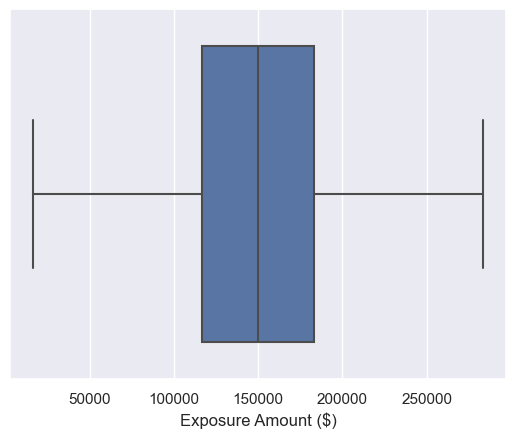

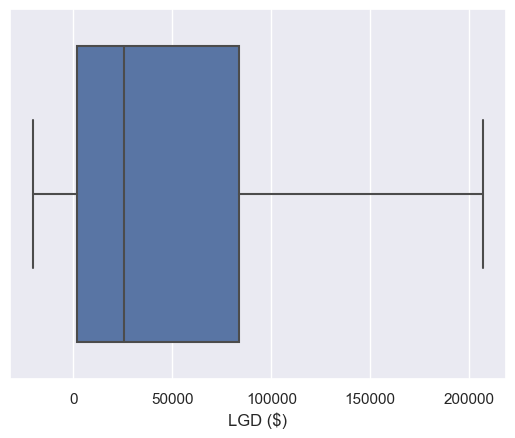

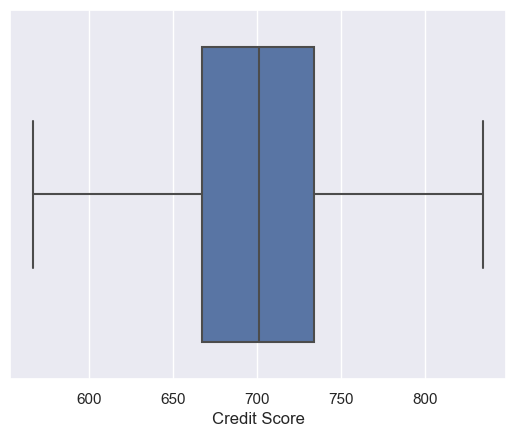

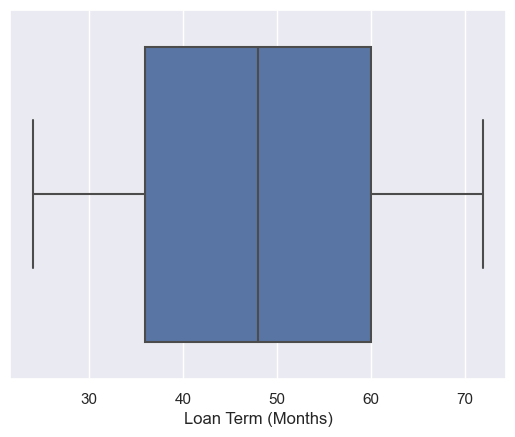

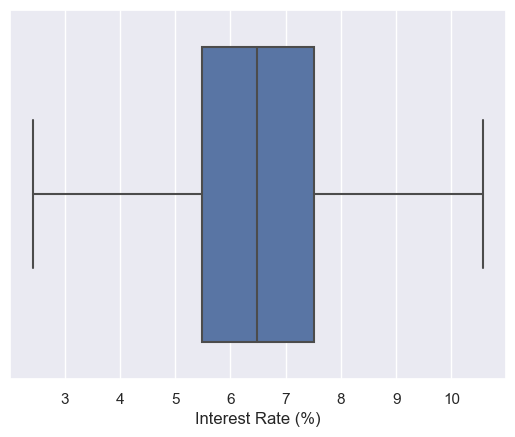

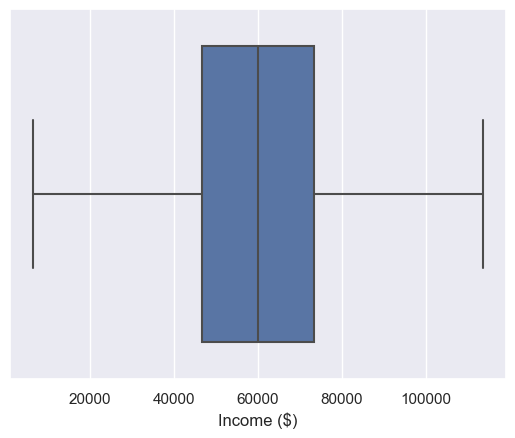

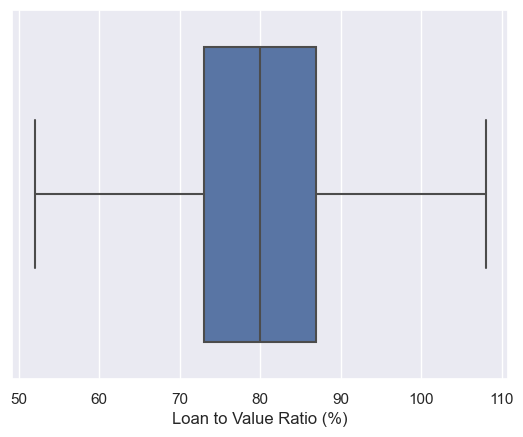

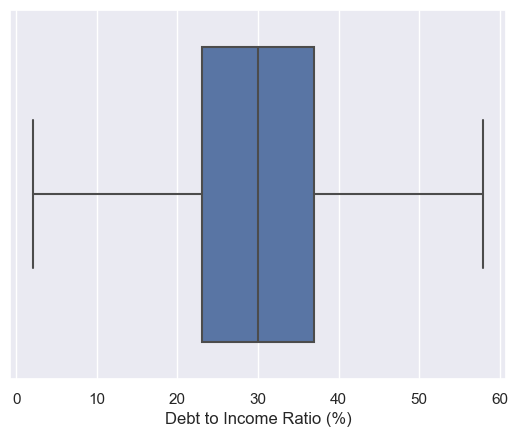

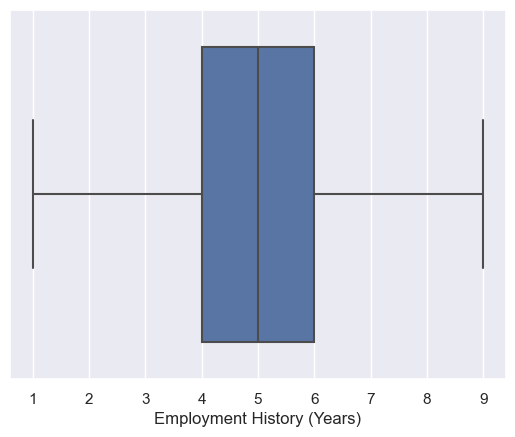

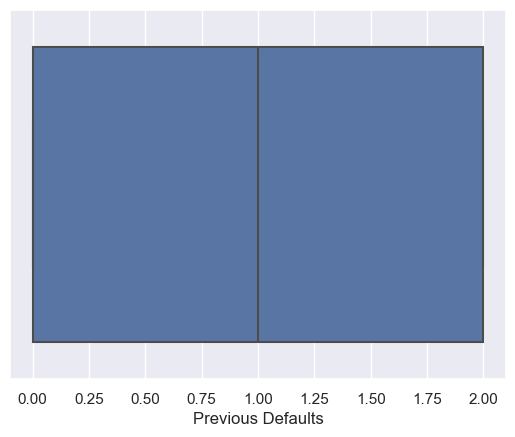

In [259]:
for i in data.columns:
    if data[i].dtypes!=object:
        data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
        data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])
        sns.boxplot(data=data,x=data[i])
        plt.show()

In [260]:
data.columns

Index(['Exposure Amount ($)', 'LGD ($)', 'Credit Score', 'Loan Term (Months)',
       'Interest Rate (%)', 'Income ($)', 'Loan to Value Ratio (%)',
       'Debt to Income Ratio (%)', 'Employment History (Years)',
       'Previous Defaults', 'Home Ownership', 'Loan Purpose', 'Loan Type',
       'Region'],
      dtype='object')

In [261]:
statistics = ['mean']

for i in statistics:
    result = data.groupby(['Credit Score']).agg({'Previous Defaults': [i]})
    result.columns = [f'Defaults_{i}_by_Credit_Score']
    result.reset_index(inplace=True)
    
    data = pd.merge(data, result, on='Credit Score', how='left')
    
for i in statistics:
    result = data.groupby(['Region']).agg({'Income ($)': [i]})
    result.columns = [f'Income_{i}_by_Region']
    result.reset_index(inplace=True)
    
    data = pd.merge(data, result, on='Region', how='left')
    
data

,Exposure Amount ($),LGD ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region,Defaults_mean_by_Credit_Score,Income_mean_by_Region
0,238203.0000,2382.0000,729.0000,36.0000,3.8100,47603.0000,88.0000,24.0000,4.0000,2.0000,Rent,Home Improvement,Adjustable Rate,South,0.9385,60082.6743
1,170008.0000,128727.0000,745.0000,36.0000,6.6800,67474.0000,71.0000,43.0000,4.0000,2.0000,Mortgage,Auto Loan,Adjustable Rate,South,1.0223,60082.6743
2,198937.0000,114418.0000,681.0000,24.0000,8.3800,77036.0000,74.0000,46.0000,6.0000,1.0000,Own,Personal Loan,Fixed Rate,West,1.0303,60307.3377
3,262045.0000,2620.0000,684.0000,48.0000,5.4500,55083.0000,85.0000,24.0000,1.0000,0.0000,Mortgage,Home Purchase,Adjustable Rate,West,0.9859,60307.3377
4,243378.0000,207175.1250,758.0000,72.0000,6.6400,70148.0000,78.0000,40.0000,5.0000,0.0000,Mortgage,Debt Consolidation,Fixed Rate,North,1.0465,59985.1788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,77140.0000,771.0000,723.0000,24.0000,5.6200,71515.0000,91.0000,17.0000,3.0000,0.0000,Mortgage,Debt Consolidation,Adjustable Rate,North,0.9864,59985.1788
39996,250556.0000,207175.1250,777.0000,72.0000,6.1600,45326.0000,88.0000,34.0000,3.0000,0.0000,Rent,Auto Loan,Fixed Rate,West,1.0333,60307.3377
39997,234493.0000,207175.1250,827.0000,60.0000,5.9700,48418.0000,78.0000,24.0000,7.0000,1.0000,Rent,Debt Consolidation,Fixed Rate,West,1.0000,60307.3377
39998,159998.0000,71285.0000,698.0000,36.0000,8.6500,85987.0000,73.0000,37.0000,6.0000,0.0000,Mortgage,Personal Loan,Adjustable Rate,West,0.9631,60307.3377


In [262]:
data.Income_mean_by_Region.value_counts()

59985.1788    10165
60307.3377    10024
60082.6743     9959
59894.0658     9852
Name: Income_mean_by_Region, dtype: int64

In [263]:
data.Defaults_mean_by_Credit_Score.value_counts()

1.0000    1453
1.0303     528
0.9535     430
1.0087     344
0.9592     343
          ... 
1.3000      10
1.2000      10
1.3333       9
1.2222       9
0.6250       8
Name: Defaults_mean_by_Credit_Score, Length: 234, dtype: int64

In [264]:
data_no_mv = data.copy()

In [265]:
from scipy import stats


for i in data_no_mv.columns:
    
    if data_no_mv[i].dtype in ['int64', 'float64']:
        
        kstest_statistic, kstest_p_value = stats.kstest(data_no_mv[i], 'norm')
        # 'norm' inside indicates that the test is comparing the distribution of the data against a normal distribution
        
        print(f'Column: {i}')
        print(f'Kolmogorov-Smirnov Test:')
        print(f'Test Statistic: {kstest_statistic}')
        print(f'p-value: {kstest_p_value}')
        
        if kstest_p_value > 0.05:
            print('Data looks normally distributed')
            print()
        else:
            print('Data does not look normally distributed')
            print()

Column: Exposure Amount ($)
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: LGD ($)
Kolmogorov-Smirnov Test:
Test Statistic: 0.998449713348428
p-value: 0.0
Data does not look normally distributed

Column: Credit Score
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: Loan Term (Months)
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: Interest Rate (%)
Kolmogorov-Smirnov Test:
Test Statistic: 0.9922397464494463
p-value: 0.0
Data does not look normally distributed

Column: Income ($)
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: Loan to Value Ratio (%)
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: Debt to Income Ratio (%)
Kolmogorov-Smirnov Test:
Test Statistic: 0.9957433287581668
p-value: 0.0
Dat

In [266]:
def target_correlation(data, target, threshold=0.1):
    corr_matrix = data.corr(method='spearman', numeric_only=True)
    
    target_correlations = corr_matrix[target].abs() > threshold
    
    variables_explaining_target = target_correlations[target_correlations].index.tolist()

    variables_explaining_target.remove(target)
    
    result_explaining_target = pd.DataFrame(
    {'Variable': variables_explaining_target,
    'Correlation with Target': corr_matrix.loc[variables_explaining_target, target]})
    
    result_explaining_target.reset_index(drop=True, inplace=True)
    
    return result_explaining_target


target_result = target_correlation(data_no_mv, 'LGD ($)')

target_result

,Variable,Correlation with Target
0,Exposure Amount ($),0.3884
1,Credit Score,0.4590
2,Loan Term (Months),0.3148
3,Interest Rate (%),0.1563
4,Income ($),0.3798
5,Loan to Value Ratio (%),0.2281
6,Debt to Income Ratio (%),0.3003
7,Employment History (Years),0.1510
8,Previous Defaults,0.2360


In [267]:
import numpy as np
import pandas as pd

def intercorrelation(data, target, threshold=0.6):
    corr_matrix = data.drop(columns=[target]).corr(method='spearman')
    
    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    
    independent_variable_pairs = np.where(highly_correlated_variables)
    
    correlated_pairs_set = set()
   
    for var1, var2 in zip(independent_variable_pairs[0], independent_variable_pairs[1]):

        if var1 < var2:
            correlated_pairs_set.add((corr_matrix.index[var1], corr_matrix.columns[var2]))
        else:
            correlated_pairs_set.add((corr_matrix.index[var2], corr_matrix.columns[var1]))
            
    print(correlated_pairs_set)
    
    result_intercorrelated_independent = pd.DataFrame(list(correlated_pairs_set), columns=['Variable 1', 'Variable 2'])
    
    return result_intercorrelated_independent

# Example usage
intercorrelated_result = intercorrelation(data_no_mv, 'LGD ($)')
intercorrelated_result


set()


/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_3567/2218498290.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.drop(columns=[target]).corr(method='spearman')


,Variable 1,Variable 2


In [268]:
data = data_no_mv.copy()

In [269]:
target_result.Variable.tolist()

['Exposure Amount ($)',
 'Credit Score',
 'Loan Term (Months)',
 'Interest Rate (%)',
 'Income ($)',
 'Loan to Value Ratio (%)',
 'Debt to Income Ratio (%)',
 'Employment History (Years)',
 'Previous Defaults']

In [270]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data, variables):
    vif_data = data[variables]
    vif_values = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    vif_result = pd.DataFrame({'VIF': vif_values, 'Features': variables})
    return vif_result


vif_result = calculate_vif(data_no_mv, [ 
                                        'Exposure Amount ($)',
# 'Credit Score',
 'Loan Term (Months)',
# 'Interest Rate (%)',
 'Income ($)',
# 'Loan to Value Ratio (%)',
 'Debt to Income Ratio (%)',
 'Employment History (Years)',
 'Previous Defaults'
                                        ])

vif_result


,VIF,Features
0,8.0707,Exposure Amount ($)
1,7.3244,Loan Term (Months)
2,8.1208,Income ($)
3,8.1167,Debt to Income Ratio (%)
4,6.5050,Employment History (Years)
5,2.4060,Previous Defaults


In [271]:
data.dtypes

Exposure Amount ($)              float64
LGD ($)                          float64
Credit Score                     float64
Loan Term (Months)               float64
Interest Rate (%)                float64
Income ($)                       float64
Loan to Value Ratio (%)          float64
Debt to Income Ratio (%)         float64
Employment History (Years)       float64
Previous Defaults                float64
Home Ownership                    object
Loan Purpose                      object
Loan Type                         object
Region                            object
Defaults_mean_by_Credit_Score    float64
Income_mean_by_Region            float64
dtype: object

In [272]:
data.columns

Index(['Exposure Amount ($)', 'LGD ($)', 'Credit Score', 'Loan Term (Months)',
       'Interest Rate (%)', 'Income ($)', 'Loan to Value Ratio (%)',
       'Debt to Income Ratio (%)', 'Employment History (Years)',
       'Previous Defaults', 'Home Ownership', 'Loan Purpose', 'Loan Type',
       'Region', 'Defaults_mean_by_Credit_Score', 'Income_mean_by_Region'],
      dtype='object')

In [273]:
data=data[['Exposure Amount ($)', 'LGD ($)',  'Loan Term (Months)',
       'Income ($)',
       'Debt to Income Ratio (%)', 'Employment History (Years)',
       'Previous Defaults', 'Home Ownership', 'Loan Purpose', 'Loan Type',
       'Region']]

In [274]:
data

,Exposure Amount ($),LGD ($),Loan Term (Months),Income ($),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region
0,238203.0000,2382.0000,36.0000,47603.0000,24.0000,4.0000,2.0000,Rent,Home Improvement,Adjustable Rate,South
1,170008.0000,128727.0000,36.0000,67474.0000,43.0000,4.0000,2.0000,Mortgage,Auto Loan,Adjustable Rate,South
2,198937.0000,114418.0000,24.0000,77036.0000,46.0000,6.0000,1.0000,Own,Personal Loan,Fixed Rate,West
3,262045.0000,2620.0000,48.0000,55083.0000,24.0000,1.0000,0.0000,Mortgage,Home Purchase,Adjustable Rate,West
4,243378.0000,207175.1250,72.0000,70148.0000,40.0000,5.0000,0.0000,Mortgage,Debt Consolidation,Fixed Rate,North
...,...,...,...,...,...,...,...,...,...,...,...
39995,77140.0000,771.0000,24.0000,71515.0000,17.0000,3.0000,0.0000,Mortgage,Debt Consolidation,Adjustable Rate,North
39996,250556.0000,207175.1250,72.0000,45326.0000,34.0000,3.0000,0.0000,Rent,Auto Loan,Fixed Rate,West
39997,234493.0000,207175.1250,60.0000,48418.0000,24.0000,7.0000,1.0000,Rent,Debt Consolidation,Fixed Rate,West
39998,159998.0000,71285.0000,36.0000,85987.0000,37.0000,6.0000,0.0000,Mortgage,Personal Loan,Adjustable Rate,West


In [275]:
data_dummies = pd.get_dummies(data, drop_first=True).astype(int)

In [276]:
targets = data_dummies['LGD ($)']
inputs = data_dummies.drop(['LGD ($)'],axis=1)

In [277]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

inputs_scaled = scaler.transform(inputs)

data_scaled = pd.DataFrame(inputs_scaled, columns=inputs.columns)

data_scaled

,Exposure Amount ($),Loan Term (Months),Income ($),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership_Own,Home Ownership_Rent,Loan Purpose_Debt Consolidation,Loan Purpose_Home Improvement,Loan Purpose_Home Purchase,Loan Purpose_Personal Loan,Loan Type_Fixed Rate,Region_North,Region_South,Region_West
0,1.7864,-0.7003,-0.6293,-0.6125,-0.5176,1.2230,-0.7096,1.4073,-0.5015,1.9890,-0.4932,-0.4962,-0.9920,-0.5837,1.7368,-0.5783
1,0.4081,-0.7003,0.3739,1.3005,-0.5176,1.2230,-0.7096,-0.7106,-0.5015,-0.5028,-0.4932,-0.4962,-0.9920,-0.5837,1.7368,-0.5783
2,0.9928,-1.4058,0.8566,1.6026,0.5131,0.0013,1.4092,-0.7106,-0.5015,-0.5028,-0.4932,2.0153,1.0081,-0.5837,-0.5758,1.7293
3,2.2683,0.0053,-0.2517,-0.6125,-2.0637,-1.2204,-0.7096,-0.7106,-0.5015,-0.5028,2.0278,-0.4962,-0.9920,-0.5837,-0.5758,1.7293
4,1.8910,1.4163,0.5089,0.9985,-0.0022,-1.2204,-0.7096,-0.7106,1.9941,-0.5028,-0.4932,-0.4962,1.0081,1.7132,-0.5758,-0.5783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,-1.4688,-1.4058,0.5779,-1.3173,-1.0330,-1.2204,-0.7096,-0.7106,1.9941,-0.5028,-0.4932,-0.4962,-0.9920,1.7132,-0.5758,-0.5783
39996,2.0361,1.4163,-0.7442,0.3944,-1.0330,-1.2204,-0.7096,1.4073,-0.5015,-0.5028,-0.4932,-0.4962,1.0081,-0.5837,-0.5758,1.7293
39997,1.7114,0.7108,-0.5881,-0.6125,1.0285,0.0013,-0.7096,1.4073,1.9941,-0.5028,-0.4932,-0.4962,1.0081,-0.5837,-0.5758,1.7293
39998,0.2058,-0.7003,1.3085,0.6964,0.5131,-1.2204,-0.7096,-0.7106,-0.5015,-0.5028,-0.4932,2.0153,-0.9920,-0.5837,-0.5758,1.7293


In [278]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_scaled, targets, test_size=0.2, random_state=365)

In [279]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [280]:
y_pred = reg.predict(X_test)

In [281]:
import pandas as pd
from sklearn import metrics
pd.options.display.float_format = '{:.2f}'.format


# Calculate metrics for the testing set
mae_test = metrics.mean_absolute_error(y_test, y_pred)
mse_test = metrics.mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = metrics.r2_score(y_test, y_pred)




# Calculate metrics for the training set
y_pred_train = reg.predict(X_train)

mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = metrics.r2_score(y_train, y_pred_train)




# Create a DataFrame to store the results
results_dict = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Train': [mae_train, mse_train, rmse_train, r2_train],
    'Test': [mae_test, mse_test, rmse_test, r2_test]
}

results_df = pd.DataFrame(results_dict)

results_df


,Metric,Train,Test
0,MAE,33332.40,33092.38
1,MSE,1772820325.96,1767804646.36
2,RMSE,42104.87,42045.27
3,R2,0.51,0.52


In [282]:
variables = []
train_r2_scores = []
test_r2_scores = []

for i in X_train.columns: 
    X_train_single_var = X_train[[i]]
    X_test_single_var = X_test[[i]]

    # Fit a regression model using the single variable on the training set
    reg.fit(X_train_single_var, y_train)
    y_pred_train_single_var = reg.predict(X_train_single_var)

    # Calculate R2 for the single variable model on the training set
    train_r2 = metrics.r2_score(y_train, y_pred_train_single_var)

    # Fit a regression model using the single variable on the test set
    reg.fit(X_test_single_var, y_test)
    y_pred_test_single_var = reg.predict(X_test_single_var)

    # Calculate R2 for the single variable model on the test set
    test_r2 = metrics.r2_score(y_test, y_pred_test_single_var)

    # Append the results to the lists
    variables.append(i)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

# Create a DataFrame from the results

results_df = pd.DataFrame({'Variable': variables, 'Train R2': train_r2_scores, 'Test R2': test_r2_scores})

results_df_sorted = results_df.sort_values(by='Test R2', ascending=False)

pd.options.display.float_format = '{:.4f}'.format

results_df_sorted


,Variable,Train R2,Test R2
2,Income ($),0.1401,0.1454
0,Exposure Amount ($),0.1174,0.1155
3,Debt to Income Ratio (%),0.0893,0.0913
1,Loan Term (Months),0.0892,0.0860
5,Previous Defaults,0.0545,0.0494
4,Employment History (Years),0.0218,0.0248
6,Home Ownership_Own,0.0000,0.0003
10,Loan Purpose_Home Purchase,0.0000,0.0002
8,Loan Purpose_Debt Consolidation,0.0000,0.0001
7,Home Ownership_Rent,0.0000,0.0001


In [283]:
data_scaled.columns

Index(['Exposure Amount ($)', 'Loan Term (Months)', 'Income ($)',
       'Debt to Income Ratio (%)', 'Employment History (Years)',
       'Previous Defaults', 'Home Ownership_Own', 'Home Ownership_Rent',
       'Loan Purpose_Debt Consolidation', 'Loan Purpose_Home Improvement',
       'Loan Purpose_Home Purchase', 'Loan Purpose_Personal Loan',
       'Loan Type_Fixed Rate', 'Region_North', 'Region_South', 'Region_West'],
      dtype='object')

In [284]:
#targets = data_dummies['log_price']

inputs = data_scaled[['Exposure Amount ($)', 'Income ($)','Debt to Income Ratio (%)', 
                      'Loan Term (Months)','Previous Defaults','Employment History (Years)']]

In [285]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=365)

In [286]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [287]:
y_pred = reg.predict(X_test)

In [288]:
# Calculate metrics for the testing set
mae_test = metrics.mean_absolute_error(y_test, y_pred)
mse_test = metrics.mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = metrics.r2_score(y_test, y_pred)

# Calculate metrics for the training set
y_pred_train = reg.predict(X_train)

mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = metrics.r2_score(y_train, y_pred_train)

# Create a DataFrame to store the results
results_dict = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Train': [mae_train, mse_train, rmse_train, r2_train],
    'Test': [mae_test, mse_test, rmse_test, r2_test]
}

results_df = pd.DataFrame(results_dict)

results_df


,Metric,Train,Test
0,MAE,33335.5422,33083.3156
1,MSE,1773338122.7100,1767286658.5182
2,RMSE,42111.0214,42039.1087
3,R2,0.5104,0.5153


# deployment

In [289]:
df1 = pd.read_excel('lgd_deploy.xlsx')

df1

,Exposure Amount ($),LGD ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region
0,81516,28224,678,36,7.9400,81749,86,29,6,1,Mortgage,Home Purchase,Adjustable Rate,West
1,89046,890,687,36,6.8400,33060,86,34,6,0,Own,Personal Loan,Adjustable Rate,South
2,161413,138306,725,48,4.2700,86242,90,24,7,2,Rent,Home Improvement,Adjustable Rate,North
3,154050,1540,589,36,8.6700,64668,76,47,7,0,Mortgage,Home Improvement,Adjustable Rate,South
4,159495,1595,640,60,4.2500,46089,85,25,4,2,Own,Debt Consolidation,Fixed Rate,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,163451,128358,770,72,5.6400,72398,80,29,3,0,Rent,Home Improvement,Fixed Rate,West
996,170284,168722,681,60,5.9100,98830,78,34,6,2,Rent,Home Improvement,Adjustable Rate,North
997,145744,7127,720,72,4.9900,53440,67,25,4,1,Mortgage,Debt Consolidation,Adjustable Rate,West
998,154271,5868,722,36,6.9200,73371,77,21,2,1,Rent,Auto Loan,Adjustable Rate,North


In [290]:
inputs.columns

Index(['Exposure Amount ($)', 'Income ($)', 'Debt to Income Ratio (%)',
       'Loan Term (Months)', 'Previous Defaults',
       'Employment History (Years)'],
      dtype='object')

In [291]:
df1=df1[['Exposure Amount ($)', 'Income ($)', 'Debt to Income Ratio (%)',
       'Loan Term (Months)', 'Previous Defaults',
       'Employment History (Years)']]

df1

,Exposure Amount ($),Income ($),Debt to Income Ratio (%),Loan Term (Months),Previous Defaults,Employment History (Years)
0,81516,81749,29,36,1,6
1,89046,33060,34,36,0,6
2,161413,86242,24,48,2,7
3,154050,64668,47,36,0,7
4,159495,46089,25,60,2,4
...,...,...,...,...,...,...
995,163451,72398,29,72,0,3
996,170284,98830,34,60,2,6
997,145744,53440,25,72,1,4
998,154271,73371,21,36,1,2


In [292]:
inputs

,Exposure Amount ($),Income ($),Debt to Income Ratio (%),Loan Term (Months),Previous Defaults,Employment History (Years)
0,1.7864,-0.6293,-0.6125,-0.7003,1.2230,-0.5176
1,0.4081,0.3739,1.3005,-0.7003,1.2230,-0.5176
2,0.9928,0.8566,1.6026,-1.4058,0.0013,0.5131
3,2.2683,-0.2517,-0.6125,0.0053,-1.2204,-2.0637
4,1.8910,0.5089,0.9985,1.4163,-1.2204,-0.0022
...,...,...,...,...,...,...
39995,-1.4688,0.5779,-1.3173,-1.4058,-1.2204,-1.0330
39996,2.0361,-0.7442,0.3944,1.4163,-1.2204,-1.0330
39997,1.7114,-0.5881,-0.6125,0.7108,0.0013,1.0285
39998,0.2058,1.3085,0.6964,-0.7003,-1.2204,0.5131


In [293]:
scaler = StandardScaler()

scaler.fit(df1)

inputs_deploy_scaled = scaler.transform(df1)

data_deploy_scaled = pd.DataFrame(inputs_deploy_scaled, columns=inputs.columns)

data_deploy_scaled

,Exposure Amount ($),Income ($),Debt to Income Ratio (%),Loan Term (Months),Previous Defaults,Employment History (Years)
0,-1.2758,1.0690,-0.0945,-0.7137,0.0025,0.4933
1,-1.1298,-1.3952,0.3942,-0.7137,-1.2379,0.4933
2,0.2733,1.2964,-0.5832,-0.0235,1.2428,0.9915
3,0.1305,0.2045,1.6649,-0.7137,-1.2379,0.9915
4,0.2361,-0.7358,-0.4855,0.6668,1.2428,-0.5032
...,...,...,...,...,...,...
995,0.3128,0.5958,-0.0945,1.3570,-1.2379,-1.0015
996,0.4453,1.9335,0.3942,0.6668,1.2428,0.4933
997,-0.0305,-0.3637,-0.4855,1.3570,0.0025,-0.5032
998,0.1348,0.6450,-0.8765,-0.7137,0.0025,-1.4998


In [294]:
data_deploy_scaled['predicted_lgd'] = reg.predict(data_deploy_scaled)

data_deploy_scaled

,Exposure Amount ($),Income ($),Debt to Income Ratio (%),Loan Term (Months),Previous Defaults,Employment History (Years),predicted_lgd
0,-1.2758,1.0690,-0.0945,-0.7137,0.0025,0.4933,38351.4206
1,-1.1298,-1.3952,0.3942,-0.7137,-1.2379,0.4933,-22553.2812
2,0.2733,1.2964,-0.5832,-0.0235,1.2428,0.9915,101041.9553
3,0.1305,0.2045,1.6649,-0.7137,-1.2379,0.9915,66252.9653
4,0.2361,-0.7358,-0.4855,0.6668,1.2428,-0.5032,55611.5919
...,...,...,...,...,...,...,...
995,0.3128,0.5958,-0.0945,1.3570,-1.2379,-1.0015,67262.1824
996,0.4453,1.9335,0.3942,0.6668,1.2428,0.4933,144212.3011
997,-0.0305,-0.3637,-0.4855,1.3570,0.0025,-0.5032,53562.3365
998,0.1348,0.6450,-0.8765,-0.7137,0.0025,-1.4998,26321.1495
